In [7]:
import pandas as pd
data = pd.read_csv('data/AlaskaMulti.csv')


In [8]:
feature_columns = ['ecoregion', 'latitude', 'longitude', 'water', 'wetland', 'shrub', 'dshrub', 'dec', 'mixed',
                   'spruce', 'baresnow', 'elev_m', 'jdate', 'radius', 'sound']
label_columns = data.columns[data.columns.str.match('^[A-Z]+')].tolist()
X = data[feature_columns].apply(pd.to_numeric, errors='coerce')
Y = data[label_columns]
X.fillna(X.mean(), inplace=True)


In [9]:
X_train, X_test = X[data['year'] != 2008], X[data['year'] == 2008]
Y_train, Y_test = Y[data['year'] != 2008], Y[data['year'] == 2008]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, accuracy_score, classification_report

forest = RandomForestClassifier(random_state=42, n_estimators=100)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, Y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [11]:
Y_pred = multi_target_forest.predict(X_test)

# Metrics
hammingloss = hamming_loss(Y_test, Y_pred)
# Exact Match Ratio (Subset Accuracy)
exact_match = accuracy_score(Y_test, Y_pred)
# Classification Report for each class
report = classification_report(Y_test, Y_pred, target_names=label_columns, zero_division=0)

print(f"Hamming Loss: {hammingloss}")
print(f"Exact Match Ratio: {exact_match}")
print(report)


ValueError: multiclass-multioutput is not supported

In [12]:
# Check the format of labels and predictions
print("Y_test type:", type(Y_test))
print("Y_pred type:", type(Y_pred))
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)

# Sample data
print("Sample Y_test values:\n", Y_test.iloc[:5])
print("Sample Y_pred values:\n", Y_pred[:5])


Y_test type: <class 'pandas.core.frame.DataFrame'>
Y_pred type: <class 'numpy.ndarray'>
Y_test shape: (100, 16)
Y_pred shape: (100, 16)
Sample Y_test values:
            PTP  AMPI  AMRO  ATSP  DEJU  FOSP  GCSP  HETH  OCWA  ROPT  SAVS  \
735  132000201     0     0     0     0     0     0     0     1     0     0   
736  134370303     0     0     0     0     0     0     0     0     0     1   
737  132000102     0     0     0     0     0     1     1     1     0     1   
738  134370302     0     0     0     0     1     0     0     0     0     1   
739  132000101     0     0     0     0     1     1     1     0     0     1   

     WCSP  WIPT  WISN  WIWA  YRWA  
735     0     0     0     1     0  
736     0     0     1     0     0  
737     0     0     1     1     0  
738     0     0     1     0     0  
739     0     0     0     1     0  
Sample Y_pred values:
 [[158520103         0         0         0         0         0         1
          1         1         0         0         0         0

In [13]:
# Removing 'PTP' column from label columns if it is present
if 'PTP' in label_columns:
    label_columns.remove('PTP')

# Recreate labels DataFrame without 'PTP'
Y = data[label_columns]

# Split data again, ensuring 'PTP' is not in the label sets
Y_train, Y_test = Y[data['year'] != 2008], Y[data['year'] == 2008]

# Fit the model again
multi_target_forest.fit(X_train, Y_train)
Y_pred = multi_target_forest.predict(X_test)

# Check shapes and sample data again
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)
print("Sample Y_test values:\n", Y_test.iloc[:5])
print("Sample Y_pred values:\n", Y_pred[:5])

# Metrics
hammingloss = hamming_loss(Y_test, Y_pred)
exact_match = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred, target_names=label_columns, zero_division=0)

print(f"Hamming Loss: {hammingloss}")
print(f"Exact Match Ratio: {exact_match}")
print(report)


Y_test shape: (100, 15)
Y_pred shape: (100, 15)
Sample Y_test values:
      AMPI  AMRO  ATSP  DEJU  FOSP  GCSP  HETH  OCWA  ROPT  SAVS  WCSP  WIPT  \
735     0     0     0     0     0     0     0     1     0     0     0     0   
736     0     0     0     0     0     0     0     0     0     1     0     0   
737     0     0     0     0     0     1     1     1     0     1     0     0   
738     0     0     0     0     1     0     0     0     0     1     0     0   
739     0     0     0     0     1     1     1     0     0     1     0     0   

     WISN  WIWA  YRWA  
735     0     1     0  
736     1     0     0  
737     1     1     0  
738     1     0     0  
739     0     1     0  
Sample Y_pred values:
 [[0 0 0 0 0 1 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 1 0]]
Hamming Loss: 0.21333333333333335
Exact Match Ratio: 0.03
              precision    recall  f1-score   support

        

In [14]:
# Assuming Y_train and Y_test are already defined and contain only the species columns

# Sum each species in the train set
species_counts_train = Y_train.sum(axis=0)

# Sum each species in the test set
species_counts_test = Y_test.sum(axis=0)

# Print the results
print("Species counts in the train set:")
print(species_counts_train)
print("\nSpecies counts in the test set:")
print(species_counts_test)


Species counts in the train set:
AMPI    126
AMRO    145
ATSP    157
DEJU    117
FOSP    222
GCSP    355
HETH    189
OCWA     97
ROPT     58
SAVS    114
WCSP    134
WIPT     62
WISN     58
WIWA    174
YRWA    120
dtype: int64

Species counts in the test set:
AMPI    18
AMRO     6
ATSP     4
DEJU     0
FOSP    27
GCSP    69
HETH    52
OCWA    36
ROPT    14
SAVS    24
WCSP     8
WIPT    23
WISN     8
WIWA    59
YRWA     0
dtype: int64


In [15]:
species_presence_test = Y_test.sum(axis=0)

# Identify columns where the count is zero in the test set
columns_to_drop = species_presence_test[species_presence_test == 0].index.tolist()

# Drop these columns from both the train and test sets
Y_train_filtered = Y_train.drop(columns=columns_to_drop)
Y_test_filtered = Y_test.drop(columns=columns_to_drop)

# Optionally, you might want to drop these columns from X_train and X_test if the features are adjusted
# However, typically feature sets (X_train and X_test) are not adjusted based on label presence

# Print the remaining columns to confirm
print("Remaining columns in Y_train:", Y_train_filtered.columns)
print("Remaining columns in Y_test:", Y_test_filtered.columns)

Remaining columns in Y_train: Index(['AMPI', 'AMRO', 'ATSP', 'FOSP', 'GCSP', 'HETH', 'OCWA', 'ROPT', 'SAVS',
       'WCSP', 'WIPT', 'WISN', 'WIWA'],
      dtype='object')
Remaining columns in Y_test: Index(['AMPI', 'AMRO', 'ATSP', 'FOSP', 'GCSP', 'HETH', 'OCWA', 'ROPT', 'SAVS',
       'WCSP', 'WIPT', 'WISN', 'WIWA'],
      dtype='object')


In [16]:
multi_target_forest.fit(X_train, Y_train)
Y_pred = multi_target_forest.predict(X_test)

# Check shapes and sample data again
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)
print("Sample Y_test values:\n", Y_test.iloc[:5])
print("Sample Y_pred values:\n", Y_pred[:5])

# Metrics
hammingloss = hamming_loss(Y_test, Y_pred)
exact_match = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred, target_names=label_columns, zero_division=0)

print(f"Hamming Loss: {hammingloss}")
print(f"Exact Match Ratio: {exact_match}")
print(report)


Y_test shape: (100, 15)
Y_pred shape: (100, 15)
Sample Y_test values:
      AMPI  AMRO  ATSP  DEJU  FOSP  GCSP  HETH  OCWA  ROPT  SAVS  WCSP  WIPT  \
735     0     0     0     0     0     0     0     1     0     0     0     0   
736     0     0     0     0     0     0     0     0     0     1     0     0   
737     0     0     0     0     0     1     1     1     0     1     0     0   
738     0     0     0     0     1     0     0     0     0     1     0     0   
739     0     0     0     0     1     1     1     0     0     1     0     0   

     WISN  WIWA  YRWA  
735     0     1     0  
736     1     0     0  
737     1     1     0  
738     1     0     0  
739     0     1     0  
Sample Y_pred values:
 [[0 0 0 0 0 1 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 1 0]]
Hamming Loss: 0.21333333333333335
Exact Match Ratio: 0.03
              precision    recall  f1-score   support

        

In [19]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
multilabel_confusion_matrix(Y_test, Y_pred)

array([[[ 82,   0],
        [ 18,   0]],

       [[ 87,   7],
        [  6,   0]],

       [[ 96,   0],
        [  4,   0]],

       [[100,   0],
        [  0,   0]],

       [[ 14,  59],
        [  3,  24]],

       [[  0,  31],
        [  3,  66]],

       [[ 18,  30],
        [ 15,  37]],

       [[ 48,  16],
        [ 13,  23]],

       [[ 86,   0],
        [ 14,   0]],

       [[ 76,   0],
        [ 24,   0]],

       [[ 92,   0],
        [  8,   0]],

       [[ 77,   0],
        [ 23,   0]],

       [[ 92,   0],
        [  8,   0]],

       [[  6,  35],
        [  3,  56]],

       [[100,   0],
        [  0,   0]]])

InvalidIndexError: (slice(None, None, None), 0)

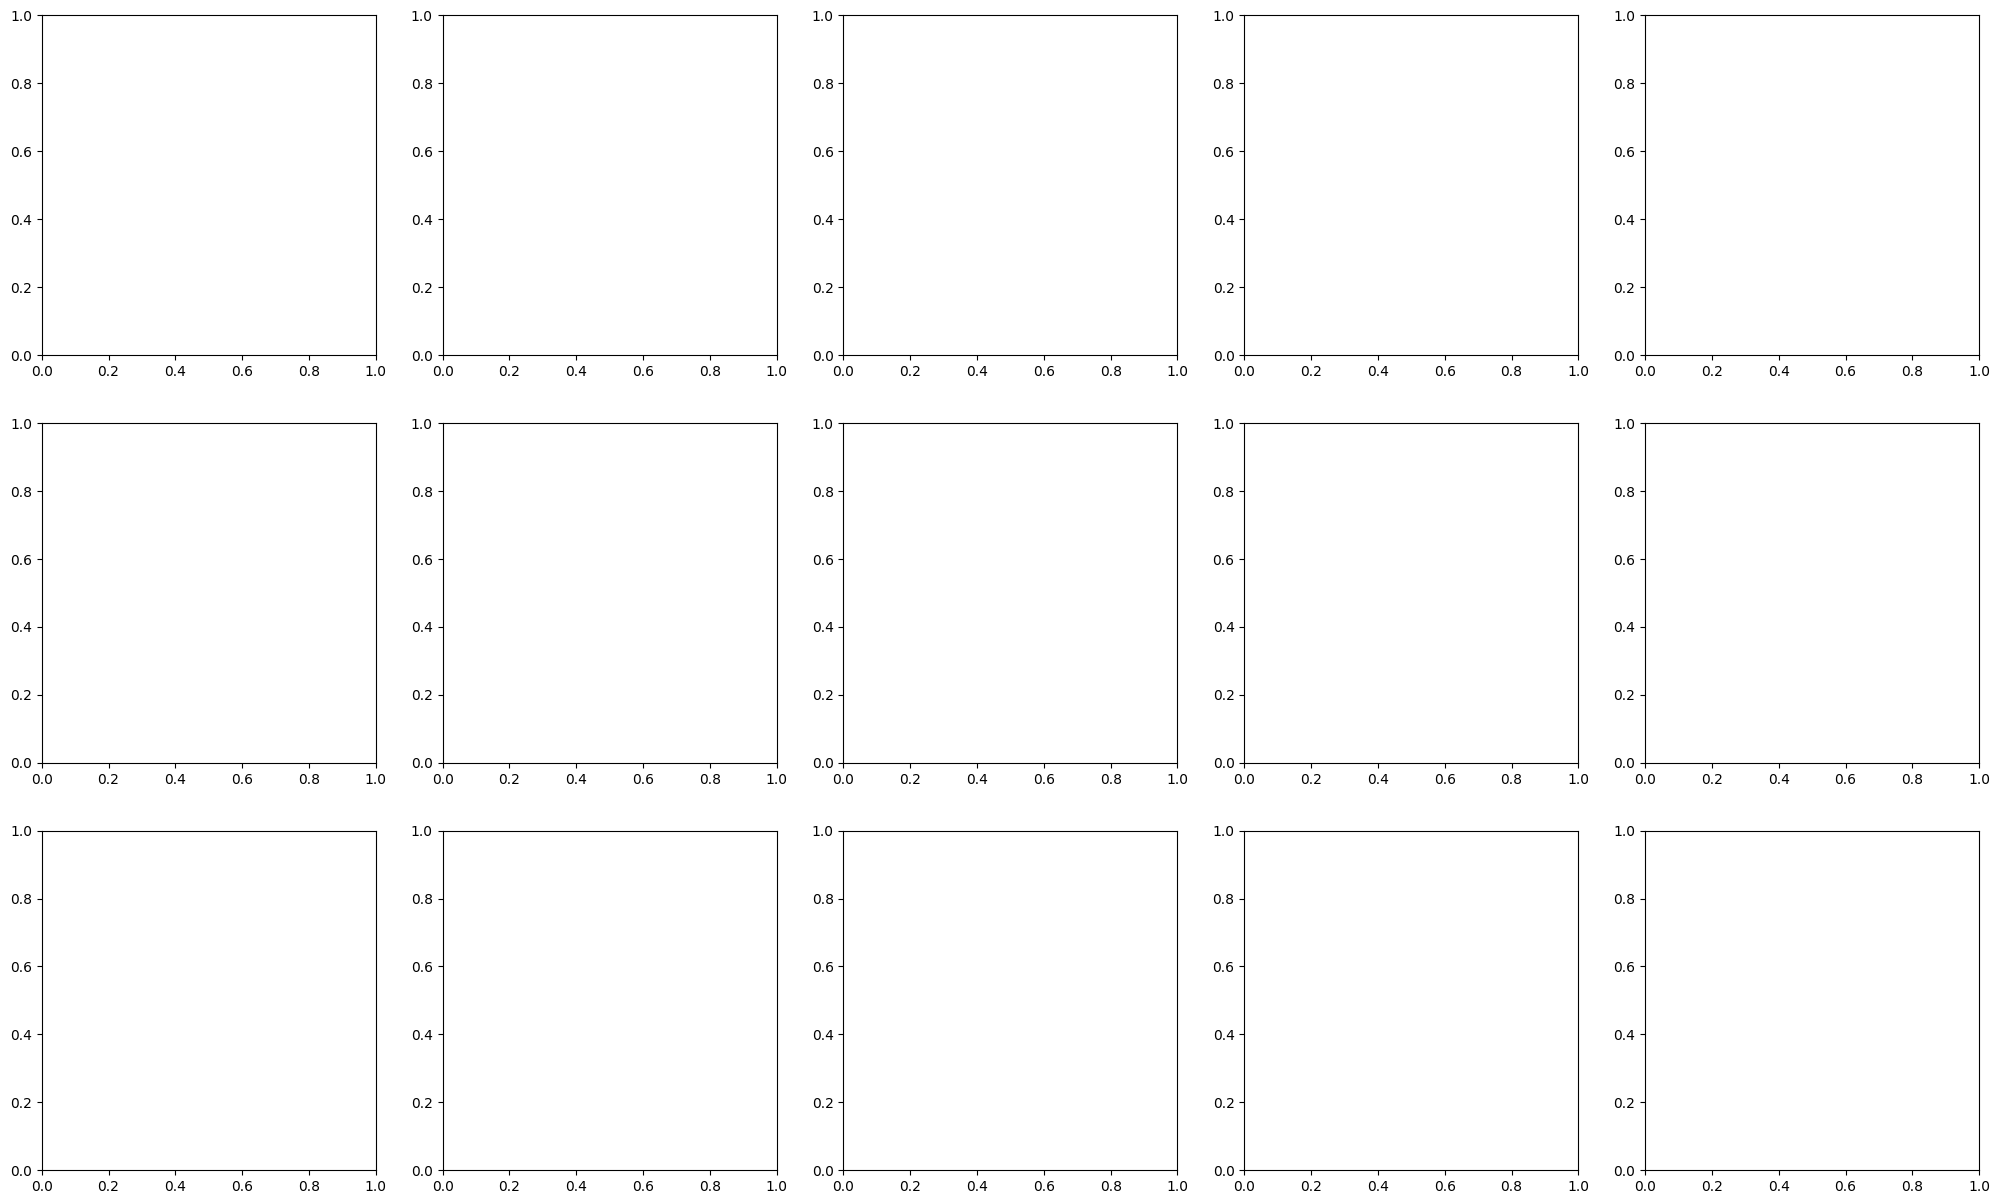

In [20]:
f, axes = plt.subplots(3, 5, figsize=(25, 15))
axes = axes.ravel()
for i in range(15):
    disp = ConfusionMatrixDisplay(confusion_matrix(Y_test[:, i],
                                                   Y_pred[:, i]),
                                  display_labels=[0, i])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'class {i}')
    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()